In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from dnetworks.model import NNet
from dnetworks.layers import (
    LinearLayer, 
    LeakyReLU, 
    Sigmoid,
    MSELoss, 
    Conv2D,
    MaxPooling2D, 
    AveragePooling2D,
    Flatten
)
from dnetworks.optimizers import Adam

### Dataset

In [2]:
# initialize the parameters of the dataset
n_samples = 10000
random_state = 1

# Create the dataset
x, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, random_state=1
)

### Model

In [4]:
# Initialize the model
model = NNet()

# Create the model structure
model.add(LinearLayer(x.shape[1], 20))
model.add(LeakyReLU())
 
model.add(LinearLayer(20,7))
model.add(LeakyReLU())
 
model.add(LinearLayer(7, 5))
model.add(LeakyReLU())
 
model.add(LinearLayer(5,1))

# set the loss functions and the optimize method
loss = MSELoss()
optim = Adam(lr=0.001)

### Train the model

In [6]:
# Train the model
costs = []

for epoch in range(7000):
    model.forward(x_train.T)
    cost = model.loss(y_train, loss)
    model.backward()
    model.optimize(optim)

    if epoch % 100 == 0:
        print ("Cost after iteration %epoch: %f" %(epoch, cost))
        costs.append(cost)

Cost after iteration 0.000000e+00poch: 4324.257692
Cost after iteration 1.000000e+02poch: 443.670184
Cost after iteration 2.000000e+02poch: 69.217344
Cost after iteration 3.000000e+02poch: 48.880776
Cost after iteration 4.000000e+02poch: 36.945276
Cost after iteration 5.000000e+02poch: 29.294941
Cost after iteration 6.000000e+02poch: 25.504009
Cost after iteration 7.000000e+02poch: 23.946967
Cost after iteration 8.000000e+02poch: 22.001994
Cost after iteration 9.000000e+02poch: 20.466137
Cost after iteration 1.000000e+03poch: 19.243503
Cost after iteration 1.100000e+03poch: 18.205905
Cost after iteration 1.200000e+03poch: 17.179663
Cost after iteration 1.300000e+03poch: 16.266738
Cost after iteration 1.400000e+03poch: 15.481194
Cost after iteration 1.500000e+03poch: 14.610083
Cost after iteration 1.600000e+03poch: 13.692370
Cost after iteration 1.700000e+03poch: 12.781531
Cost after iteration 1.800000e+03poch: 12.166655
Cost after iteration 1.900000e+03poch: 11.388145
Cost after iterat

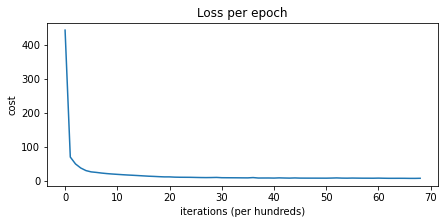

In [7]:
# plot the loss evolution
costs_ss = pd.Series(costs[1:])

plt.figure(figsize=(7, 3))
plt.plot(costs_ss)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Loss per epoch')
plt.show()